In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numexpr
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = [8, 6]

In [16]:
lora_mons_static = pd.read_pickle('../data/lora_mons_static_clean.pkl.gz')
channel = lora_mons_static.query('gtw_id == "eui-0000024b08030186"')[['received', 'dev_id', 'rssi', 'snr', 'data_rate']].set_index('received').sort_index()
channel.index = channel.index.tz_convert('Europe/Brussels')
channel['spreading_factor'] = channel['data_rate'].str.extract('SF([0-9]+)BW').astype(dtype=np.int64)

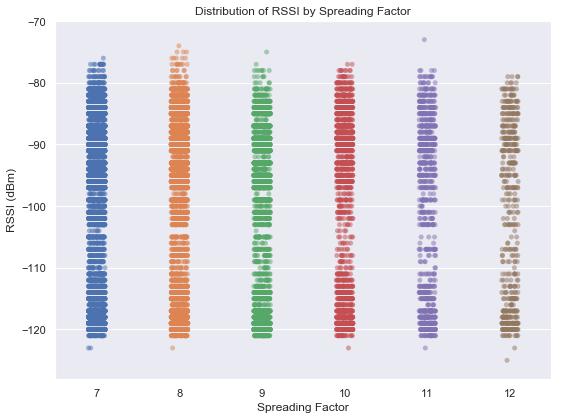

In [38]:
g = sns.stripplot(x='spreading_factor', y='rssi', data=channel, alpha=0.5)
g.set(ylabel='RSSI (dBm)', xlabel='Spreading Factor', title='Distribution of RSSI by Spreading Factor')
plt.tight_layout()
g.figure.savefig('../rssi_sf.png')

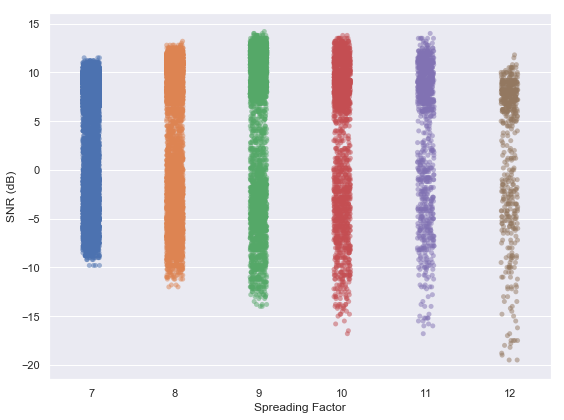

In [41]:
g = sns.stripplot(x='spreading_factor', y='snr', data=channel, alpha=0.5)
g.set(ylabel='SNR (dB)', xlabel='Spreading Factor')
plt.tight_layout()
g.figure.savefig('../snr_sf.png')

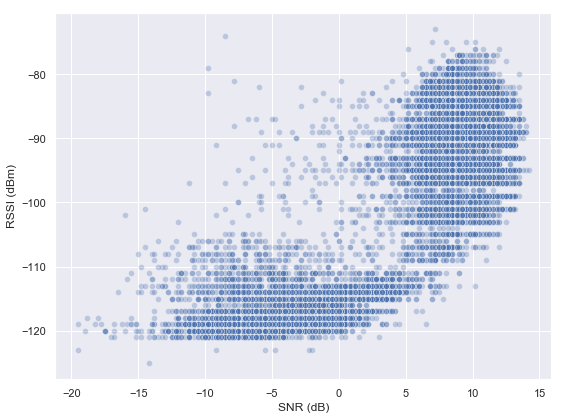

In [40]:
g = sns.scatterplot(x='snr', y='rssi', data=channel, alpha=0.3)
g.set(xlabel='SNR (dB)', ylabel='RSSI (dBm)')
plt.tight_layout()
g.figure.savefig('../rssi_snr.png')